In [2]:
import sys
import math
import time
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
#import matplotlib as mlt
from sklearn.metrics import mean_squared_error
import scipy
import warnings
warnings.filterwarnings("ignore")


class SGLD:

    def __init__(self, beta, lam_c, lr, q, seed):
        self.beta = beta # Temperature para
        self.lam_c = lam_c # Regularization
        self.lr = lr # Learning rate
        self.q = q
        self.seed = seed

    def cal_H(self, x, theta):
        H = - self.q + 1 * (x < theta) + 2 * self.lam_c * theta
        return H

    def estimate(self, x_array):
        """x_array: numpy array sampled from distribution, student-t or normal"""
        np.random.seed(self.seed)
        theta = np.random.normal(0, 1) # initial value \theta_0
        theta_dup = [theta]

        # updating
        for i in range(len(x_array)):
            theta += -self.lr * self.cal_H(x_array[i], theta) \
                     + math.sqrt((2 * self.lr / self.beta)) * np.random.normal(0, 1)
            theta_dup.append(theta)
        
        #expectation = self.lam_c * theta
        #for j in range(len(x_array)):
        #    expectation += (theta + (1/(1-self.q)) * (x_array[j] - theta) * (x_array[j] > theta) )/len(x_array)

        return theta,theta_dup #, expectation

class SGHMC:

    def __init__(self, beta, lam_c, lr, gamma, q, seed):
        self.beta = beta # Temperature para
        self.lam_c = lam_c # Regularization
        self.lr = lr # Learning rate
        self.q = q
        self.gamma = gamma # momentum
        self.seed = seed

    def cal_H(self, x, theta):
        """ m = 1"""
        H = -self.q + 1*(x < theta) + 2 * self.lam_c * theta
        return H

    def estimate(self, x_array):
        np.random.seed(self.seed)
        theta = np.random.normal(0, 1) # initial value \theta_0
        vol = 1 #np.random.normal(0, 1) # initial value v_0
        theta_dup = [theta]
        
        # updating
        for i in range(len(x_array)):
            vol += - self.lr * self.gamma * vol - self.lr * self.cal_H(x_array[i], theta) + math.sqrt((2 * self.lr * self.gamma / self.beta)) * np.random.normal(0, 1)
            theta += self.lr * vol
            theta_dup.append(theta)

        return theta, theta_dup #, expectation

## log(W_dist)-log(step_size)
### logistic(0, 1) 0.95, seed1

In [236]:
beta = 1e+10
lam_c = 1e-5
lr_1 = 0.1; lr_2 = 0.15;lr_3 = 0.25;lr_4 = 0.4;lr_5 = 0.5;lr_6 = 0.6;
gamma = 0.5 # gamma的选取对结果影响很大
seed= 1234;
seed1=1111;seed2=2222;seed3=3333;seed4=8888;seed5=7777
n =200
lr=0.1

Model095_SGLD_sd_1 = SGLD(beta, lam_c, lr, 0.95, seed1)
Model095_SGLD_sd_2 = SGLD(beta, lam_c, lr, 0.95, seed2)
Model095_SGLD_sd_3 = SGLD(beta, lam_c, lr, 0.95, seed3)
Model095_SGLD_sd_4 = SGLD(beta, lam_c, lr, 0.95, seed4)
Model095_SGLD_sd_5 = SGLD(beta, lam_c, lr, 0.95, seed5)



Model095_SGHMC_sd_1 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed1)
Model095_SGHMC_sd_2 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed2)
Model095_SGHMC_sd_3 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed3)
Model095_SGHMC_sd_4 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed4)
Model095_SGHMC_sd_5 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed5)


Model095_SGHMC_lr_1 = SGHMC(beta, lam_c, lr_1, gamma, 0.95, seed)
Model095_SGHMC_lr_2 = SGHMC(beta, lam_c, lr_2, gamma, 0.95, seed)
Model095_SGHMC_lr_3 = SGHMC(beta, lam_c, lr_3, gamma, 0.95, seed)
Model095_SGHMC_lr_4 = SGHMC(beta, lam_c, lr_4, gamma, 0.95, seed)
Model095_SGHMC_lr_5 = SGHMC(beta, lam_c, lr_5, gamma, 0.95, seed)
Model095_SGHMC_lr_6 = SGHMC(beta, lam_c, lr_6, gamma, 0.95, seed)

In [237]:
### data 

np.random.seed(seed1)
x_logistic_mu0_scale1_sd1 = np.random.logistic(0, 1, int(n))
np.random.seed(seed2)
x_logistic_mu0_scale1_sd2 = np.random.logistic(0, 1, int(n))
np.random.seed(seed3)
x_logistic_mu0_scale1_sd3 = np.random.logistic(0, 1, int(n))
np.random.seed(seed4)
x_logistic_mu0_scale1_sd4 = np.random.logistic(0, 1, int(n))
np.random.seed(seed5)
x_logistic_mu0_scale1_sd5 = np.random.logistic(0, 1, int(n))

In [238]:
### estimation

theta_SGLD_sd_1, theta_all_SGLD_sd_1 = Model095_SGLD_sd_1.estimate(x_logistic_mu0_scale1_sd1)
theta_SGLD_sd_2, theta_all_SGLD_sd_2 = Model095_SGLD_sd_2.estimate(x_logistic_mu0_scale1_sd2)
theta_SGLD_sd_3, theta_all_SGLD_sd_3 = Model095_SGLD_sd_3.estimate(x_logistic_mu0_scale1_sd3)
theta_SGLD_sd_4, theta_all_SGLD_sd_4 = Model095_SGLD_sd_4.estimate(x_logistic_mu0_scale1_sd4)
theta_SGLD_sd_5, theta_all_SGLD_sd_5 = Model095_SGLD_sd_5.estimate(x_logistic_mu0_scale1_sd5)

theta_SGHMC_sd_1, theta_all_SGHMC_sd_1 = Model095_SGHMC_sd_1.estimate(x_logistic_mu0_scale1_sd1)
theta_SGHMC_sd_2, theta_all_SGHMC_sd_2 = Model095_SGHMC_sd_2.estimate(x_logistic_mu0_scale1_sd2)
theta_SGHMC_sd_3, theta_all_SGHMC_sd_3 = Model095_SGHMC_sd_3.estimate(x_logistic_mu0_scale1_sd3)
theta_SGHMC_sd_4, theta_all_SGHMC_sd_4 = Model095_SGHMC_sd_4.estimate(x_logistic_mu0_scale1_sd4)
theta_SGHMC_sd_5, theta_all_SGHMC_sd_5 = Model095_SGHMC_sd_5.estimate(x_logistic_mu0_scale1_sd5)


theta_SGHMC_lr_1, theta_all_SGHMC_lr_1 = Model095_SGHMC_lr_1.estimate(x_logistic_mu0_scale1_sd1)
theta_SGHMC_lr_2, theta_all_SGHMC_lr_2 = Model095_SGHMC_lr_2.estimate(x_logistic_mu0_scale1_sd1)
theta_SGHMC_lr_3, theta_all_SGHMC_lr_3 = Model095_SGHMC_lr_3.estimate(x_logistic_mu0_scale1_sd1)
theta_SGHMC_lr_4, theta_all_SGHMC_lr_4 = Model095_SGHMC_lr_4.estimate(x_logistic_mu0_scale1_sd1)
theta_SGHMC_lr_5, theta_all_SGHMC_lr_5 = Model095_SGHMC_lr_5.estimate(x_logistic_mu0_scale1_sd1)
theta_SGHMC_lr_6, theta_all_SGHMC_lr_6 = Model095_SGHMC_lr_6.estimate(x_logistic_mu0_scale1_sd1)


## Excess risk
### We denote by $u(\theta_n) - u^{\ast}$ excess risk.

In [239]:
def func_l_q(x, theta=2.944, q=0.95):
    # theta = 2.944 is optimal value, quantile = 0.95

    return (q - 1*(x < theta)) * (x - theta)

u_ast = np.mean(func_l_q(x_logistic_mu0_scale1_sd1))# + lam_c * 2.944**2
u_ast

0.19689086532500644

In [240]:
u_theta_sgld_1 = [];u_theta_sgld_2 = [];u_theta_sgld_3 = [];u_theta_sgld_4 = [];u_theta_sgld_5 = [];

for i in range(len(theta_all_SGLD_sd_1)):
    u_theta_sgld_1.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd1, theta = theta_all_SGLD_sd_1[i])) + lam_c * theta_all_SGLD_sd_1[i]**2)
    u_theta_sgld_2.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd2, theta = theta_all_SGLD_sd_2[i])) + lam_c * theta_all_SGLD_sd_2[i]**2)
    u_theta_sgld_3.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd3, theta = theta_all_SGLD_sd_3[i])) + lam_c * theta_all_SGLD_sd_3[i]**2)
    u_theta_sgld_4.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd4, theta = theta_all_SGLD_sd_4[i])) + lam_c * theta_all_SGLD_sd_4[i]**2)
    u_theta_sgld_5.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd5, theta = theta_all_SGLD_sd_5[i])) + lam_c * theta_all_SGLD_sd_5[i]**2)

In [241]:
u_theta_1 = [];u_theta_2 = [];u_theta_3 = [];u_theta_4 = [];u_theta_5 = [];

for i in range(len(theta_all_SGHMC_sd_1)):
    u_theta_1.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd1, theta = theta_all_SGHMC_sd_1[i])) + lam_c * theta_all_SGHMC_sd_1[i]**2)
    u_theta_2.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd2, theta = theta_all_SGHMC_sd_2[i])) + lam_c * theta_all_SGHMC_sd_2[i]**2)
    u_theta_3.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd3, theta = theta_all_SGHMC_sd_3[i])) + lam_c * theta_all_SGHMC_sd_3[i]**2)
    u_theta_4.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd4, theta = theta_all_SGHMC_sd_4[i])) + lam_c * theta_all_SGHMC_sd_4[i]**2)
    u_theta_5.append(np.mean(func_l_q(x_logistic_mu0_scale1_sd5, theta = theta_all_SGHMC_sd_5[i])) + lam_c * theta_all_SGHMC_sd_5[i]**2)

In [242]:
#u_theta_5-u_ast

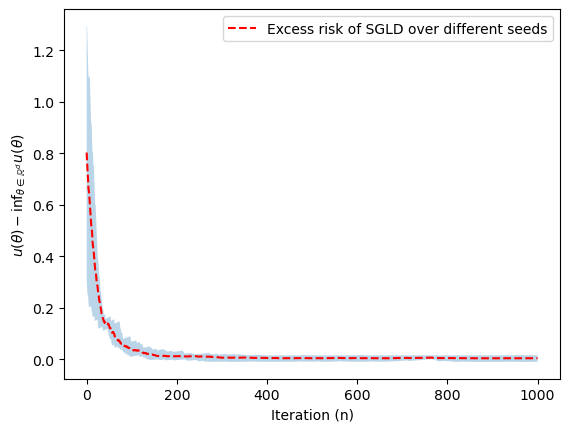

In [243]:
x = np.arange(len(theta_all_SGLD_sd_1)) 
u_theta_sgld_u_ast_1 = u_theta_sgld_1 - u_ast
u_theta_sgld_u_ast_2 = u_theta_sgld_2 - u_ast
u_theta_sgld_u_ast_3 = u_theta_sgld_3 - u_ast
u_theta_sgld_u_ast_4 = u_theta_sgld_4 - u_ast
u_theta_sgld_u_ast_5 = u_theta_sgld_5 - u_ast

u_theta_sgld_u_ast = np.mean([u_theta_sgld_u_ast_1, u_theta_sgld_u_ast_2, u_theta_sgld_u_ast_3, u_theta_sgld_u_ast_4, u_theta_sgld_u_ast_5], axis=0)
u_theta_sgld_u_ast_upp = np.maximum(np.maximum(np.maximum(np.maximum(u_theta_sgld_u_ast_1,u_theta_sgld_u_ast_2), u_theta_sgld_u_ast_3), u_theta_sgld_u_ast_4), u_theta_sgld_u_ast_5)
u_theta_sgld_u_ast_low = np.minimum(np.minimum(np.minimum(np.minimum(u_theta_sgld_u_ast_1,u_theta_sgld_u_ast_2), u_theta_sgld_u_ast_3), u_theta_sgld_u_ast_4), u_theta_sgld_u_ast_5)


plt.plot(x, u_theta_sgld_u_ast,'r--', label="Excess risk of SGLD over different seeds") # 绘制当前模型的曲线

    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, u_theta_sgld_u_ast_upp, u_theta_sgld_u_ast_low, #上限，下限
         #facecolor='green', #填充颜色
         #edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.legend()
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'$u(\theta) - \inf_{\theta \in \mathbb{R}^d} u(\theta)$',fontsize=10)
#plt.savefig('excess_risk.png')
plt.show()

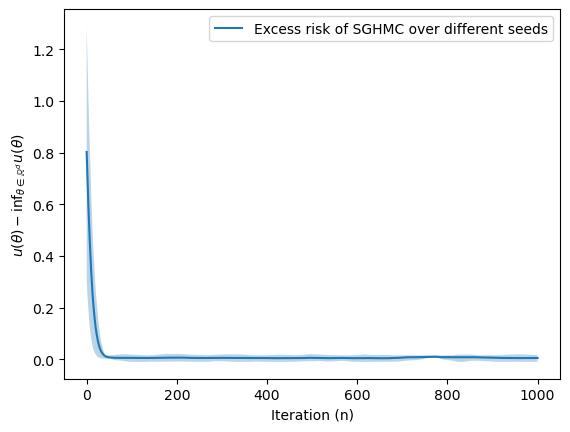

In [244]:
x = np.arange(len(theta_all_SGHMC_sd_1)) 
u_theta_u_ast_1 = u_theta_1 - u_ast
u_theta_u_ast_2 = u_theta_2 - u_ast
u_theta_u_ast_3 = u_theta_3 - u_ast
u_theta_u_ast_4 = u_theta_4 - u_ast
u_theta_u_ast_5 = u_theta_5 - u_ast

u_theta_u_ast = np.mean([u_theta_u_ast_1, u_theta_u_ast_2, u_theta_u_ast_3, u_theta_u_ast_4, u_theta_u_ast_5], axis=0)
u_theta_u_ast_upp = np.maximum(np.maximum(np.maximum(np.maximum(u_theta_u_ast_1,u_theta_u_ast_2), u_theta_u_ast_3), u_theta_u_ast_4), u_theta_u_ast_5)
u_theta_u_ast_low = np.minimum(np.minimum(np.minimum(np.minimum(u_theta_u_ast_1,u_theta_u_ast_2), u_theta_u_ast_3), u_theta_u_ast_4), u_theta_u_ast_5)


plt.plot(x, u_theta_u_ast, label="Excess risk of SGHMC over different seeds") # 绘制当前模型的曲线

    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, u_theta_u_ast_upp, u_theta_u_ast_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.legend()
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'$u(\theta) - \inf_{\theta \in \mathbb{R}^d} u(\theta)$',fontsize=10)
plt.savefig('excess_risk.png')
plt.show()

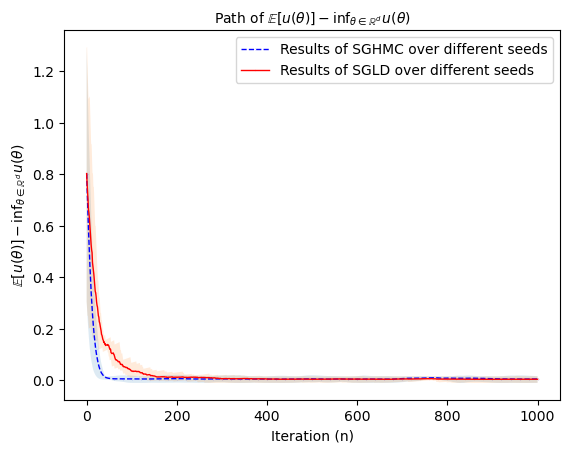

In [245]:
#plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'Path of $\mathbb{E} [u(\theta)] - \inf_{\theta \in \mathbb{R}^d} u(\theta)$', size = 10) # 设置标题以及大小
models = ['Results of SGHMC over different seeds', 'Results of SGLD over different seeds'] # 定义好所有模型名称
maker = ['o','.'] # 曲线标记
ls=['--','-']
color = ['b', 'r']
cnt=0
x = np.arange(len(theta_all_SGLD_sd_1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'Results of SGHMC over different seeds': u_theta_u_ast,
    'Results of SGLD over different seeds': u_theta_sgld_u_ast
}
ranges_top = { # 用于展示每个方法的上界
    'Results of SGHMC over different seeds': u_theta_u_ast_upp,
    'Results of SGLD over different seeds': u_theta_sgld_u_ast_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'Results of SGHMC over different seeds': u_theta_u_ast_low,
    'Results of SGLD over different seeds': u_theta_sgld_u_ast_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =20
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, ls=ls[cnt], color=color[cnt], marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
         #facecolor='green', #填充颜色
         #edgecolor='red', #边界颜色
        alpha=0.15
    ) #透明度
    #plt.axhline(y=2.944,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'$\mathbb{E} \left[u(\theta)\right] - \inf_{\theta \in \mathbb{R}^d} u(\theta)$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend() # 设置信息框
#plt.grid(False) # 不显示网格线
#ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
#ax.spines['right'].set_color('#ccc')
#ax.spines['top'].set_color('#ccc')
#ax.spines['left'].set_color('#ccc')
#ax.spines['bottom'].set_color('#ccc')
plt.savefig('excess_risk.png')

In [246]:
theta_SGHMC_real, theta_all_SGHMC_real = SGHMC(beta, lam_c, 1e-5, gamma, 0.95, seed1).estimate(np.random.logistic(0, 1, int(1e6)))

In [247]:
# Ground Truth
theta_all_ground_truth_sd1_95 = theta_all_SGHMC_real[-len(theta_all_SGHMC_lr_1[int(n*0.1):]):]

In [248]:
w_d_1 = scipy.stats.wasserstein_distance(theta_all_SGHMC_lr_1[int(n*0.1):], theta_all_ground_truth_sd1_95, u_weights=None, v_weights=None)
w_d_2 = scipy.stats.wasserstein_distance(theta_all_SGHMC_lr_2[int(n*0.1):], theta_all_ground_truth_sd1_95, u_weights=None, v_weights=None)
w_d_3 = scipy.stats.wasserstein_distance(theta_all_SGHMC_lr_3[int(n*0.1):], theta_all_ground_truth_sd1_95, u_weights=None, v_weights=None)
w_d_4 = scipy.stats.wasserstein_distance(theta_all_SGHMC_lr_4[int(n*0.1):], theta_all_ground_truth_sd1_95, u_weights=None, v_weights=None)
w_d_5 = scipy.stats.wasserstein_distance(theta_all_SGHMC_lr_5[int(n*0.1):], theta_all_ground_truth_sd1_95, u_weights=None, v_weights=None)
w_d_6 = scipy.stats.wasserstein_distance(theta_all_SGHMC_lr_6[int(n*0.1):], theta_all_ground_truth_sd1_95, u_weights=None, v_weights=None)

log_wd = [np.log(w_d_1), np.log(w_d_2), np.log(w_d_3), np.log(w_d_4),np.log(w_d_5), np.log(w_d_6)]
log_lr = [np.log(lr_1), np.log(lr_2), np.log(lr_3), np.log(lr_4),np.log(lr_5), np.log(lr_6)]

plt.scatter(log_lr, log_wd, color="red")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(log_lr, log_wd) #斜率 截距 R2
print('slope', slope)

linear_model = np.polyfit(log_lr, log_wd, 1)
linear_model_fn = np.poly1d(linear_model)
x_s = np.arange(-4.75, -2.5)
line1 = plt.plot(x_s, linear_model_fn(x_s), color="blue", linestyle='-', label='SGHMC, slope ≈ 0.594')
line2 = plt.plot([-4.75, -2.75], [-2.4, -1.4], color="orange", linestyle='--', linewidth=2, label='Reference line, slope = 0.5')
plt.title('Rate of convergence of SGHMC algorithm')
plt.xlabel(r"log($\eta$)")
plt.ylabel(r"$log(W_1(\mathcal{L}(\theta_n), \pi_{\beta}))$")
plt.legend()

plt.savefig('wasserstein_stepsize.png')
plt.show()

In [7]:
beta = 1e+10
lam_c = 1e-5
lr = 0.001
gamma = 0.5 # gamma的选取对结果影响很大
seed_1= 1111; seed_2 = 2222; seed_3 = 3333; seed_4 = 4444; seed_5 = 5555

Model095_SGLD_sd1 = SGLD(beta, lam_c, lr, 0.95, seed_1)
Model095_SGHMC_sd1 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed_1)
Model099_SGLD_sd1 = SGLD(beta, lam_c, lr, 0.99, seed_1)
Model099_SGHMC_sd1 = SGHMC(beta, lam_c, lr, gamma, 0.99, seed_1)

Model095_SGLD_sd2 = SGLD(beta, lam_c, lr, 0.95, seed_2)
Model095_SGHMC_sd2 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed_2)
Model099_SGLD_sd2 = SGLD(beta, lam_c, lr, 0.99, seed_2)
Model099_SGHMC_sd2 = SGHMC(beta, lam_c, lr, gamma, 0.99, seed_2)

Model095_SGLD_sd3 = SGLD(beta, lam_c, lr, 0.95, seed_3)
Model095_SGHMC_sd3 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed_3)
Model099_SGLD_sd3 = SGLD(beta, lam_c, lr, 0.99, seed_3)
Model099_SGHMC_sd3 = SGHMC(beta, lam_c, lr, gamma, 0.99, seed_3)

Model095_SGLD_sd4 = SGLD(beta, lam_c, lr, 0.95, seed_4)
Model095_SGHMC_sd4 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed_4)
Model099_SGLD_sd4 = SGLD(beta, lam_c, lr, 0.99, seed_4)
Model099_SGHMC_sd4 = SGHMC(beta, lam_c, lr, gamma, 0.99, seed_4)

Model095_SGLD_sd5 = SGLD(beta, lam_c, lr, 0.95, seed_5)
Model095_SGHMC_sd5 = SGHMC(beta, lam_c, lr, gamma, 0.95, seed_5)
Model099_SGLD_sd5 = SGLD(beta, lam_c, lr, 0.99, seed_5)
Model099_SGHMC_sd5 = SGHMC(beta, lam_c, lr, gamma, 0.99, seed_5)

## Logistic

In [12]:
# Logistic 1
x_logistic_mu0_scale1 = np.random.logistic(0, 1, int(2e+5))
#x_logistic_mu0_scale10 = np.random.logistic(0, 1, int(2e+5))
#x_logistic_mu5_scale10 = np.random.logistic(0, 1, int(2e+5))

theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_logistic_mu0_scale1)
#theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_logistic_mu0_scale1)
#theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_logistic_mu0_scale1)

In [16]:
theta_all_ground_truth_sd1_95 = [2.944]*len(theta_all_SGLD_sd1_95)


In [19]:
import scipy
scipy.stats.wasserstein_distance(theta_all_SGLD_sd1_95, theta_all_ground_truth_sd1_95, u_weights=None, v_weights=None)
# learning_rate = 0.001

0.23044176819117151

In [97]:
# Logistic 1
x_logistic_mu0_scale1 = np.random.logistic(0, 1, int(2e+5))
#x_logistic_mu0_scale10 = np.random.logistic(0, 1, int(2e+5))
#x_logistic_mu5_scale10 = np.random.logistic(0, 1, int(2e+5))

theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_logistic_mu0_scale1)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_logistic_mu0_scale1)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_logistic_mu0_scale1)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_logistic_mu0_scale1)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_logistic_mu0_scale1)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_logistic_mu0_scale1)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_logistic_mu0_scale1)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_logistic_mu0_scale1)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_logistic_mu0_scale1)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_logistic_mu0_scale1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_logistic_mu0_scale1)


In [98]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [2.944]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')

theta_SGHMC_95:2.9361763337738793, var_SGHMC_95:0.0010039705983524744
theta_SGLD_95:2.938811268447166, var_SGLD_95:0.00035617400082316116
mse_SGHMC_95:0.1277501076465857, mse_SGLD_95:0.19932366676919094


In [99]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [4.595]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')

theta_SGHMC_99:4.539575932307961, var_SGHMC_99:0.00020054810094044734
theta_SGLD_99:4.411457609849492, var_SGLD_99:0.006771520608878924
mse_SGHMC_99:0.5361490650833132, mse_SGLD_99:1.1327977600698553


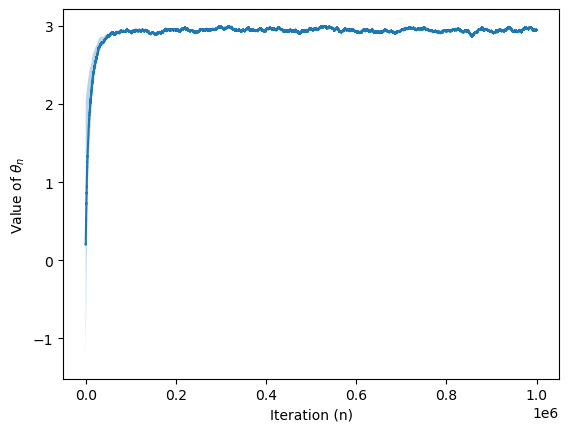

In [57]:
# 设定五个种子 留下均值和最大最小
theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1_95).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1_95).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2_95).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2_95).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3_95).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3_95).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4_95).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4_95).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5_95).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5_95).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'Value of $\theta_n$',fontsize=10)
plt.show()

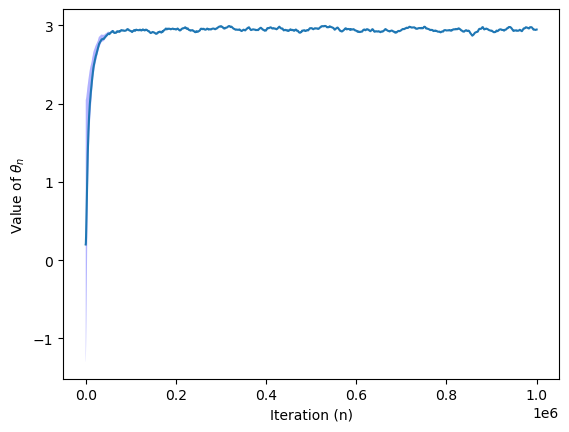

In [58]:
# 设定五个种子 留下均值和最大最小
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'Value of $\theta_n$',fontsize=10)
plt.show()

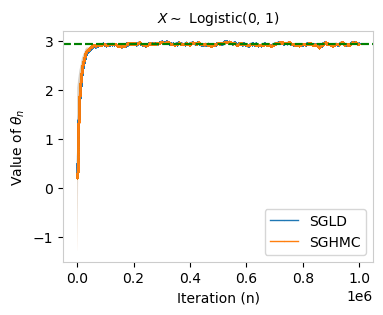

In [59]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Logistic(0, 1)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=2.944,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'logistic_0_1.png', dpi=300, bbox_inches='tight')

In [100]:
# Logistic 2
#x_logistic_mu0_scale1 = np.random.logistic(0, 1, int(2e+5))
x_logistic_mu_1_scale1 = np.random.logistic(-1, 1, int(2e+5))
#x_logistic_mu5_scale10 = np.random.logistic(-3, 3, int(2e+5))


theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_logistic_mu_1_scale1)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_logistic_mu_1_scale1)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_logistic_mu_1_scale1)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_logistic_mu_1_scale1)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_logistic_mu_1_scale1)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_logistic_mu_1_scale1)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_logistic_mu_1_scale1)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_logistic_mu_1_scale1)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_logistic_mu_1_scale1)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_logistic_mu_1_scale1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_logistic_mu_1_scale1)


In [101]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [1.944]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')

theta_SGHMC_95:1.9650298488896671, var_SGHMC_95:0.0007795618901019413
theta_SGLD_95:1.947183977416743, var_SGLD_95:0.0002592062232330892
mse_SGHMC_95:0.07364826505804192, mse_SGLD_95:0.11928026162447822


In [102]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [3.595]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')

theta_SGHMC_99:3.599564372061395, var_SGHMC_99:0.0010706105677562834
theta_SGLD_99:3.4380747272406, var_SGLD_99:0.007125590787079179
mse_SGHMC_99:0.42510287022793525, mse_SGLD_99:0.8904434958706405


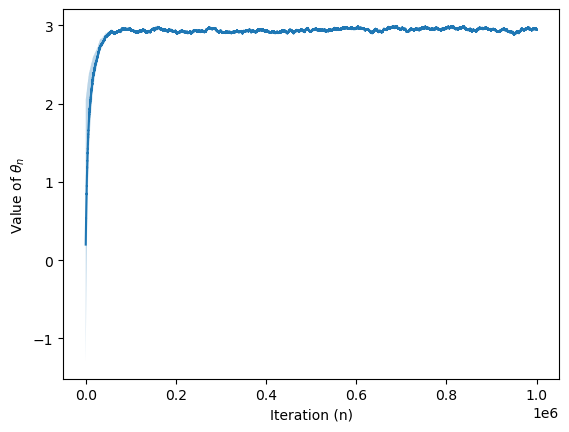

In [30]:
# 设定五个种子 留下均值和最大最小
theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1_95).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1_95).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2_95).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2_95).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3_95).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3_95).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4_95).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4_95).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5_95).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5_95).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'Value of $\theta_n$',fontsize=10)
plt.show()

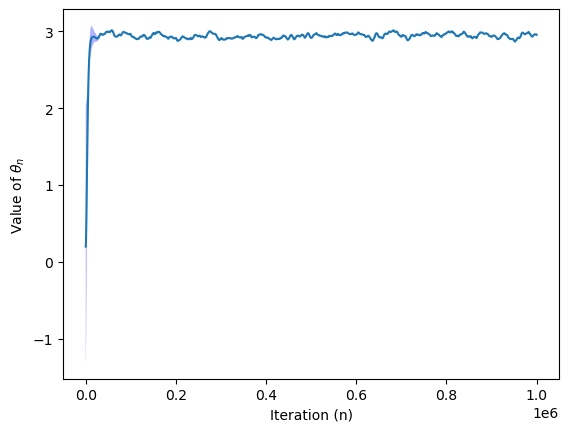

In [31]:
# 设定五个种子 留下均值和最大最小
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'Value of $\theta_n$',fontsize=10)
plt.show()

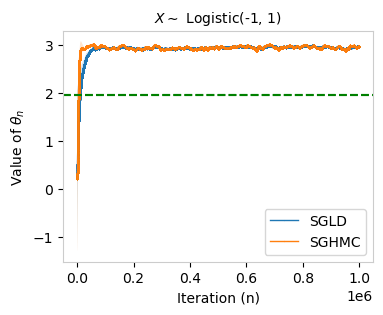

In [32]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Logistic(-1, 1)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=1.944,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'logistic_1_1.png', dpi=300, bbox_inches='tight')

In [103]:
# Logistic 3
#x_logistic_mu0_scale1 = np.random.logistic(0, 1, int(2e+5))
#x_logistic_mu_3_scale3 = np.random.logistic(-1, 1, int(2e+5))
x_logistic_mu_3_scale3 = np.random.logistic(-3, 3, int(2e+5))

theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_logistic_mu_3_scale3)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_logistic_mu_3_scale3)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_logistic_mu_3_scale3)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_logistic_mu_3_scale3)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_logistic_mu_3_scale3)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_logistic_mu_3_scale3)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_logistic_mu_3_scale3)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_logistic_mu_3_scale3)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_logistic_mu_3_scale3)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_logistic_mu_3_scale3)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_logistic_mu_3_scale3)


In [104]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [5.833]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')

theta_SGHMC_95:5.808092373737208, var_SGHMC_95:0.0011087637823314798
theta_SGLD_95:5.664208685168737, var_SGLD_95:0.016152042041213864
mse_SGHMC_95:1.554945688633737, mse_SGLD_95:2.9574397854652843


In [105]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [10.785]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')

theta_SGHMC_99:9.783961295616283, var_SGHMC_99:0.09073305424315822
theta_SGLD_99:8.506553520257494, var_SGLD_99:0.18209895015865643
mse_SGHMC_99:12.66703823792413, mse_SGLD_99:23.30804887514312


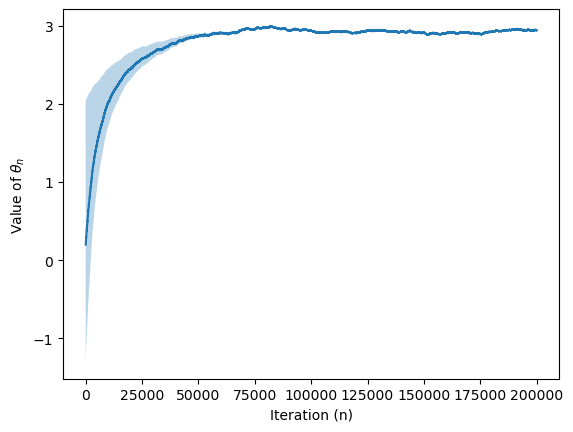

In [525]:
# 设定五个种子 留下均值和最大最小
theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'Value of $\theta_{n}$',fontsize=10)
plt.show()

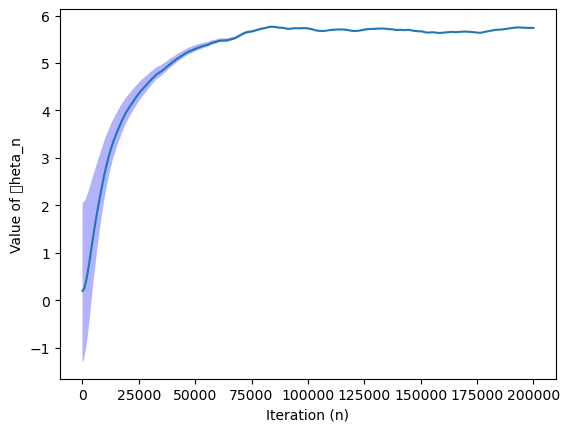

In [355]:
# 设定五个种子 留下均值和最大最小
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

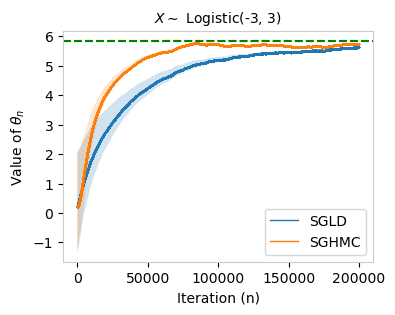

In [356]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Logistic(-3, 3)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=5.833,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'logistic_3_3.png', dpi=300, bbox_inches='tight')

In [357]:
theta_all_SGHMC_variance = np.var([theta_all_SGHMC_sd1[10000:], theta_all_SGHMC_sd2[10000:], theta_all_SGHMC_sd3[10000:], theta_all_SGHMC_sd4[10000:], theta_all_SGHMC_sd5[10000:]])
theta_all_SGLD_variance = np.var([theta_all_SGLD_sd1[10000:], theta_all_SGLD_sd2[10000:], theta_all_SGLD_sd3[10000:], theta_all_SGLD_sd4[10000:], theta_all_SGLD_sd5[10000:]])
theta_all_SGHMC_mean = np.mean([theta_SGHMC_sd1, theta_SGHMC_sd2, theta_SGHMC_sd3, theta_SGHMC_sd4, theta_SGHMC_sd5])
print(f'theta:{theta_all_SGHMC_mean}, var_SGHMC:{theta_all_SGHMC_variance}, var_SGLD:{theta_all_SGLD_variance}')

theta:5.739874926077976, var_SGHMC:0.3555983103170703, var_SGLD:0.8810739258516455


## Normal

In [106]:
# Normal-dis 1 
x_norm_mu0_sig1 = np.random.normal(-1, 1, int(2e+5))
#x_norm_mu1_sig2 = np.random.normal(1, 2, int(2e+5))
#x_norm_mu3_sig5 = np.random.normal(3, 5, int(2e+5))
#x_norm_mu0_sig_4 = np.random.normal(0, 1, int(2e+5))

theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_norm_mu0_sig1)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_norm_mu0_sig1)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_norm_mu0_sig1)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_norm_mu0_sig1)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_norm_mu0_sig1)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_norm_mu0_sig1)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_norm_mu0_sig1)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_norm_mu0_sig1)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_norm_mu0_sig1)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_norm_mu0_sig1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_norm_mu0_sig1)


In [107]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [0.645]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')

theta_SGHMC_95:0.675730765469847, var_SGHMC_95:0.00030897739563099687
theta_SGLD_95:0.6778907703197137, var_SGLD_95:0.00017483574727970567
mse_SGHMC_95:0.034579229640720625, mse_SGLD_95:0.04736573631838664


In [108]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [1.326]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')

theta_SGHMC_99:1.3369566322582436, var_SGHMC_99:9.941800336166112e-05
theta_SGLD_99:1.3354947905859351, var_SGLD_99:0.0008924756917341821
mse_SGHMC_99:0.04794584963922401, mse_SGLD_99:0.08906746132313527


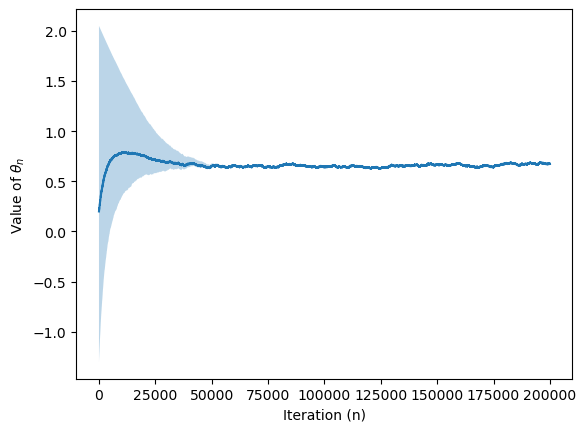

In [407]:
# 设定五个种子 留下均值和最大最小
theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1_95).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1_95).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2_95).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2_95).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3_95).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3_95).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4_95).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4_95).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5_95).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5_95).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r'Value of $\theta_{n}$',fontsize=10)
plt.show()

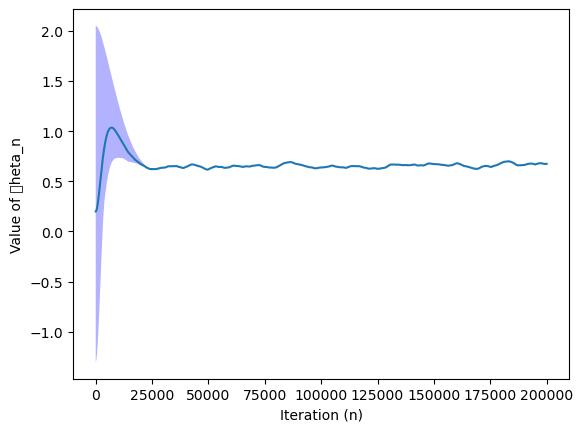

In [408]:
# 设定五个种子 留下均值和最大最小
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

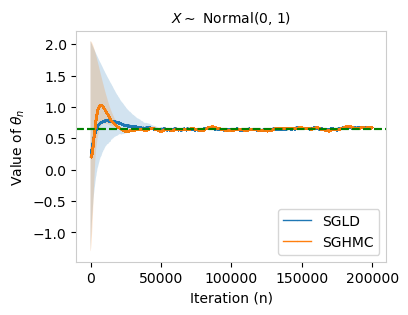

In [409]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Normal(0, 1)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=0.645,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'norm_0_1.png', dpi=300, bbox_inches='tight')

In [109]:
# Normal-dis 2
x_norm_mu1_sig2 = np.random.normal(1, 2, int(2e+5))

theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_norm_mu1_sig2)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_norm_mu1_sig2)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_norm_mu1_sig2)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_norm_mu1_sig2)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_norm_mu1_sig2)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_norm_mu1_sig2)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_norm_mu1_sig2)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_norm_mu1_sig2)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_norm_mu1_sig2)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_norm_mu1_sig2)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_norm_mu1_sig2)


In [110]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [4.290]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')

theta_SGHMC_95:4.348984491896309, var_SGHMC_95:0.0005646934627429066
theta_SGLD_95:4.34152651647947, var_SGLD_95:0.000349611781883506
mse_SGHMC_95:0.25881666092894184, mse_SGLD_95:0.3842203641061564


In [111]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [5.653]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')


theta_SGHMC_99:5.655558526157614, var_SGHMC_99:0.00018083575947371895
theta_SGLD_99:5.585900746264184, var_SGLD_99:0.004410189124005371
mse_SGHMC_99:0.5935987974263778, mse_SGLD_99:1.1592675619311477


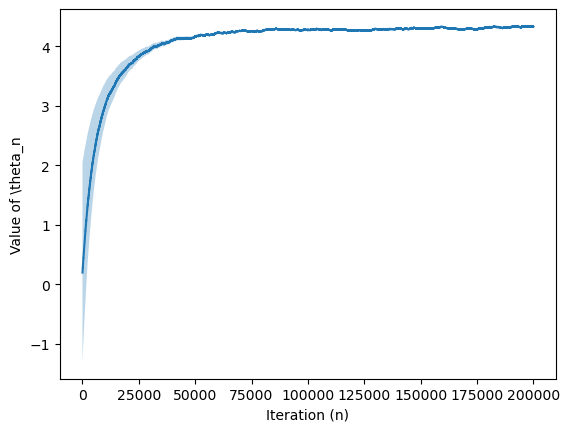

In [412]:
# 设定五个种子 留下均值和最大最小
theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1_95).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1_95).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2_95).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2_95).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3_95).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3_95).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4_95).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4_95).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5_95).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5_95).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()

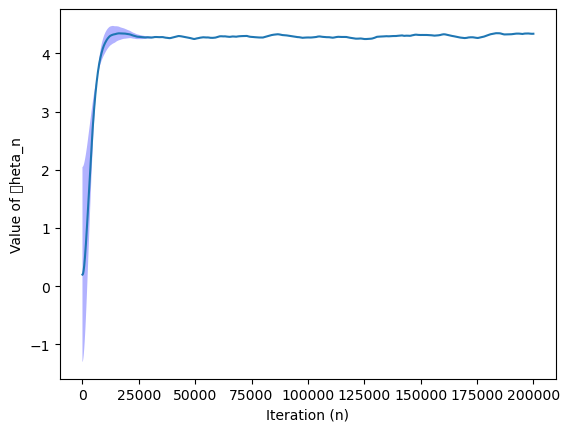

In [413]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

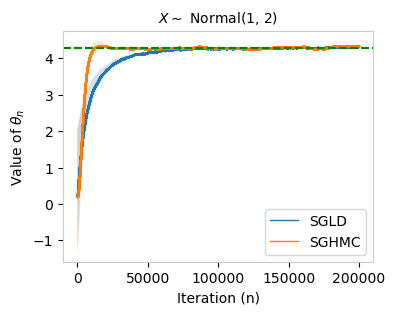

In [414]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Normal(1, 2)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=4.290,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'norm_1_2.png', dpi=300, bbox_inches='tight')

In [112]:
# Normal-dis 3
x_norm_mu3_sig5 = np.random.normal(3, 5, int(2e+5))

theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_norm_mu3_sig5)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_norm_mu3_sig5)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_norm_mu3_sig5)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_norm_mu3_sig5)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_norm_mu3_sig5)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_norm_mu3_sig5)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_norm_mu3_sig5)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_norm_mu3_sig5)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_norm_mu3_sig5)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_norm_mu3_sig5)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_norm_mu3_sig5)


In [113]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [11.224]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')

theta_SGHMC_95:11.336515996002452, var_SGHMC_95:0.001897593492104822
theta_SGLD_95:11.241258675740237, var_SGLD_95:0.020969749855461496
mse_SGHMC_95:3.5961746127307146, mse_SGLD_95:6.439926626527819


In [114]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [14.632]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')


theta_SGHMC_99:14.324924609823869, var_SGHMC_99:0.03444928490073885
theta_SGLD_99:13.52748015693884, var_SGLD_99:0.13752191393808863
mse_SGHMC_99:9.661908306551712, mse_SGLD_99:18.681152980250072


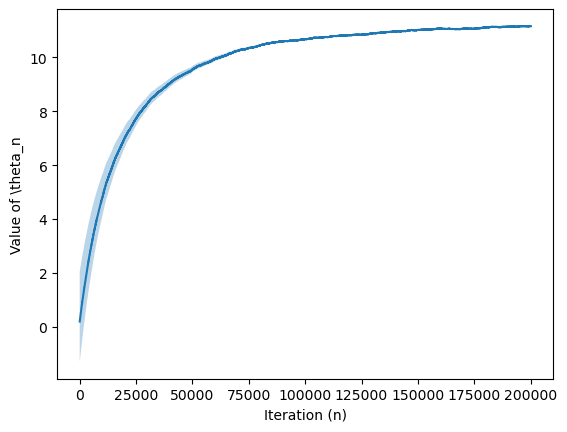

In [417]:
# 设定五个种子 留下均值和最大最小
theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1_95).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1_95).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2_95).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2_95).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3_95).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3_95).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4_95).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4_95).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5_95).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5_95).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()

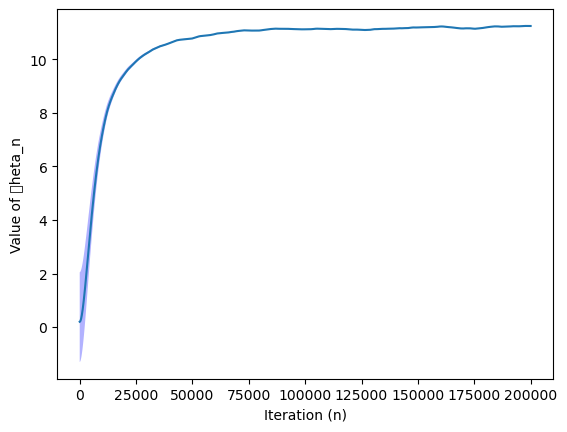

In [418]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

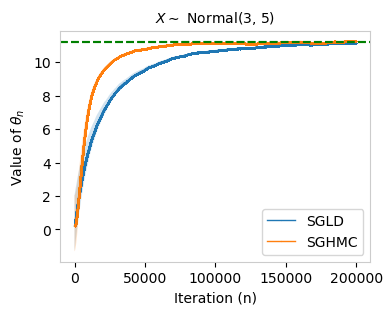

In [419]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Normal(3, 5)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=11.224,c="g", ls="--")
    plt.xlabel(r'Iteration (n)',fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'norm_3_5.png', dpi=300, bbox_inches='tight')

## t-distribution

### xt_10

In [267]:
# t-dis
#xt_10 = np.random.standard_t(10, int(2e+5))
#xt_7 = np.random.standard_t(7, int(2e+5))
xt_3 = np.random.standard_t(3, int(2e+5))


theta_SGLD, theta_all_SGLD_sd1  = Model099_SGLD_sd1.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd1 = Model099_SGHMC_sd1.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd2 = Model099_SGLD_sd2.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd2 = Model099_SGHMC_sd2.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd3 = Model099_SGLD_sd3.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd3 = Model099_SGHMC_sd3.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd4 = Model099_SGLD_sd4.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd4 = Model099_SGHMC_sd4.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd5 = Model099_SGLD_sd5.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd5 = Model099_SGHMC_sd5.estimate(xt_3)


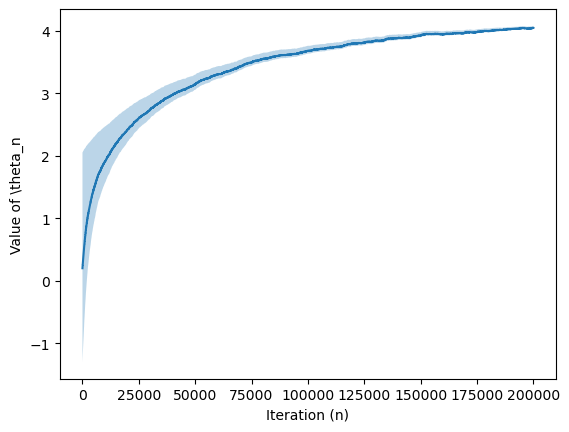

In [268]:
theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()

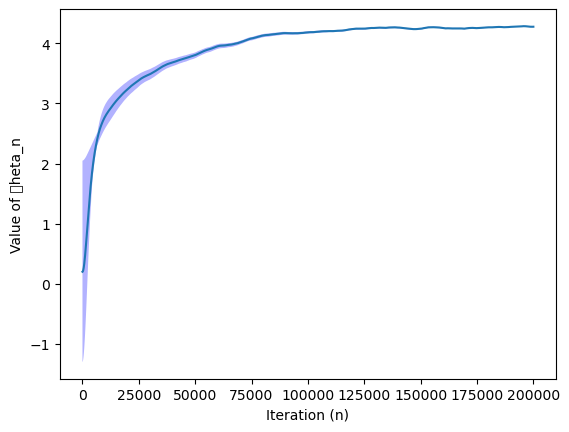

In [269]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

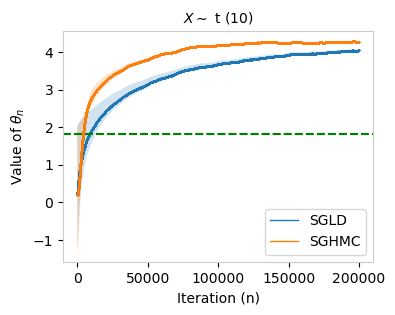

In [270]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ t (10)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=1.812,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'t_10.png', dpi=300, bbox_inches='tight')

In [271]:
theta_all_SGHMC_variance = np.var([theta_all_SGHMC_sd1[10000:], theta_all_SGHMC_sd2[10000:], theta_all_SGHMC_sd3[10000:], theta_all_SGHMC_sd4[10000:], theta_all_SGHMC_sd5[10000:]])
theta_all_SGLD_variance = np.var([theta_all_SGLD_sd1[10000:], theta_all_SGLD_sd2[10000:], theta_all_SGLD_sd3[10000:], theta_all_SGLD_sd4[10000:], theta_all_SGLD_sd5[10000:]])
theta_all_SGHMC_mean = np.mean([theta_SGHMC_sd1, theta_SGHMC_sd2, theta_SGHMC_sd3, theta_SGHMC_sd4, theta_SGHMC_sd5])
print(f'theta:{theta_all_SGHMC_mean}, var_SGHMC:{theta_all_SGHMC_variance}, var_SGLD:{theta_all_SGLD_variance}')

theta:1.6730034973447254, var_SGHMC:0.12056353189858446, var_SGLD:0.27218544606389444


### xt_7

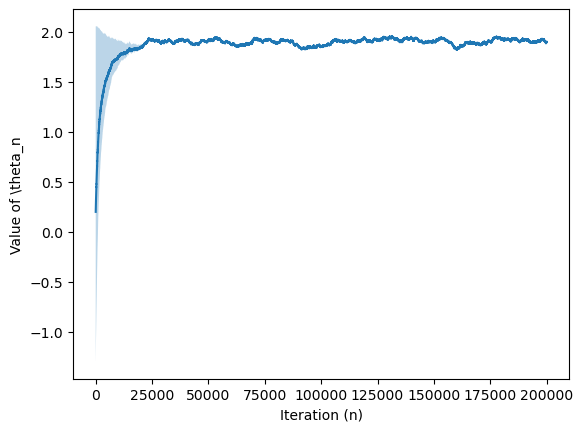

In [297]:
# 1.895
xt_7 = np.random.standard_t(7, int(2e+5))

theta_SGLD, theta_all_SGLD_sd1 = Model095_SGLD_sd1.estimate(xt_7)
theta_SGHMC, theta_all_SGHMC_sd1 = Model095_SGHMC_sd1.estimate(xt_7)

theta_SGLD, theta_all_SGLD_sd2 = Model095_SGLD_sd2.estimate(xt_7)
theta_SGHMC, theta_all_SGHMC_sd2 = Model095_SGHMC_sd2.estimate(xt_7)

theta_SGLD, theta_all_SGLD_sd3 = Model095_SGLD_sd3.estimate(xt_7)
theta_SGHMC, theta_all_SGHMC_sd3 = Model095_SGHMC_sd3.estimate(xt_7)

theta_SGLD, theta_all_SGLD_sd4 = Model095_SGLD_sd4.estimate(xt_7)
theta_SGHMC, theta_all_SGHMC_sd4 = Model095_SGHMC_sd4.estimate(xt_7)

theta_SGLD, theta_all_SGLD_sd5 = Model095_SGLD_sd5.estimate(xt_7)
theta_SGHMC, theta_all_SGHMC_sd5 = Model095_SGHMC_sd5.estimate(xt_7)

theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()

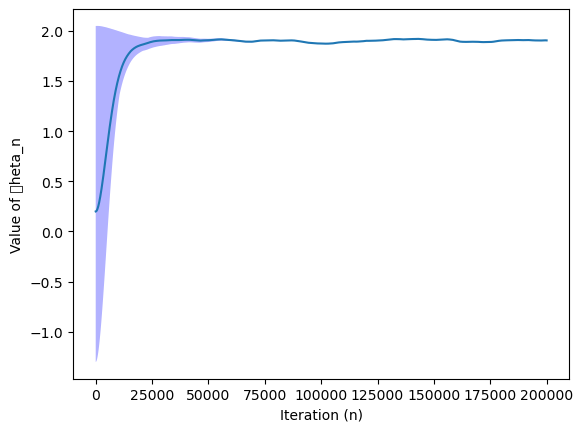

In [298]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

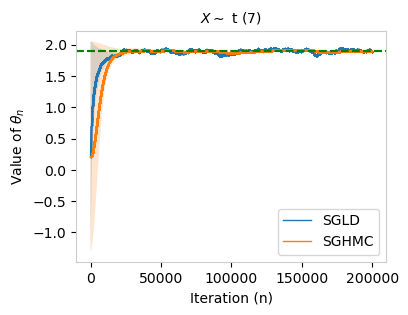

In [299]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ t (7)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=1.895,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'t_7.png', dpi=300, bbox_inches='tight')

In [ ]:
theta_all_SGHMC_variance = np.var([theta_all_SGHMC_sd1[10000:], theta_all_SGHMC_sd2[10000:], theta_all_SGHMC_sd3[10000:], theta_all_SGHMC_sd4[10000:], theta_all_SGHMC_sd5[10000:]])
theta_all_SGLD_variance = np.var([theta_all_SGLD_sd1[10000:], theta_all_SGLD_sd2[10000:], theta_all_SGLD_sd3[10000:], theta_all_SGLD_sd4[10000:], theta_all_SGLD_sd5[10000:]])
theta_all_SGHMC_mean = np.mean([theta_SGHMC_sd1, theta_SGHMC_sd2, theta_SGHMC_sd3, theta_SGHMC_sd4, theta_SGHMC_sd5])
print(f'theta:{theta_all_SGHMC_mean}, var_SGHMC:{theta_all_SGHMC_variance}, var_SGLD:{theta_all_SGLD_variance}')

### xt_3

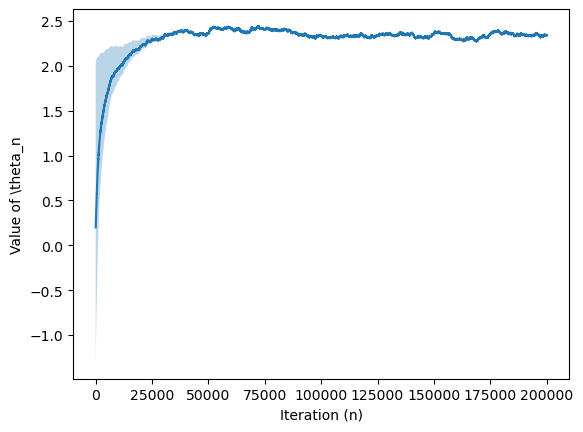

In [300]:
# 2.353
xt_3 = np.random.standard_t(3, int(2e+5))

theta_SGLD, theta_all_SGLD_sd1 = Model095_SGLD_sd1.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd1 = Model095_SGHMC_sd1.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd2 = Model095_SGLD_sd2.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd2 = Model095_SGHMC_sd2.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd3 = Model095_SGLD_sd3.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd3 = Model095_SGHMC_sd3.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd4 = Model095_SGLD_sd4.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd4 = Model095_SGHMC_sd4.estimate(xt_3)

theta_SGLD, theta_all_SGLD_sd5 = Model095_SGLD_sd5.estimate(xt_3)
theta_SGHMC, theta_all_SGHMC_sd5 = Model095_SGHMC_sd5.estimate(xt_3)

theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()

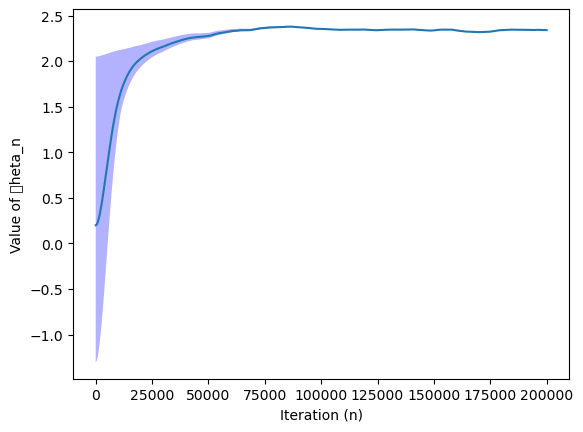

In [301]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

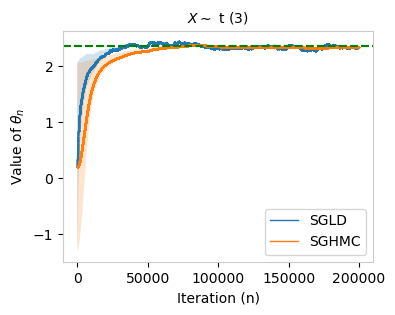

In [302]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ t (3)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=2.353,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')
plt.savefig("./"+'t_3.png', dpi=300, bbox_inches='tight')

## Lognormal

### lognorm 0 1 

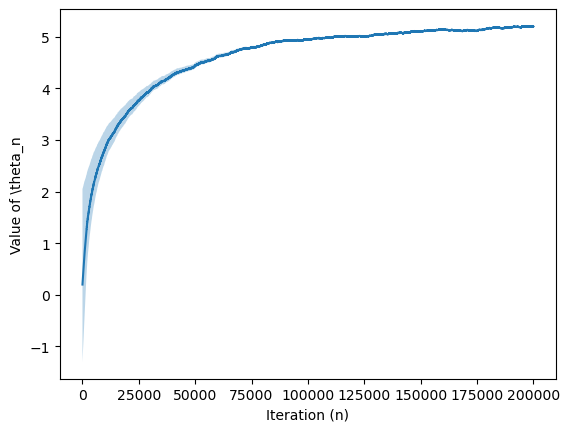

In [272]:
# lognromal
xlogn_mu0_sig_1 = np.random.lognormal(mean=0.0, sigma=1.0, size=int(2e+5))

theta_SGLD, theta_all_SGLD_sd1 = Model095_SGLD_sd1.estimate(xlogn_mu0_sig_1)
theta_SGHMC, theta_all_SGHMC_sd1 = Model095_SGHMC_sd1.estimate(xlogn_mu0_sig_1)

theta_SGLD, theta_all_SGLD_sd2 = Model095_SGLD_sd2.estimate(xlogn_mu0_sig_1)
theta_SGHMC, theta_all_SGHMC_sd2 = Model095_SGHMC_sd2.estimate(xlogn_mu0_sig_1)

theta_SGLD, theta_all_SGLD_sd3 = Model095_SGLD_sd3.estimate(xlogn_mu0_sig_1)
theta_SGHMC, theta_all_SGHMC_sd3 = Model095_SGHMC_sd3.estimate(xlogn_mu0_sig_1)

theta_SGLD, theta_all_SGLD_sd4 = Model095_SGLD_sd4.estimate(xlogn_mu0_sig_1)
theta_SGHMC, theta_all_SGHMC_sd4 = Model095_SGHMC_sd4.estimate(xlogn_mu0_sig_1)

theta_SGLD, theta_all_SGLD_sd5 = Model095_SGLD_sd5.estimate(xlogn_mu0_sig_1)
theta_SGHMC, theta_all_SGHMC_sd5 = Model095_SGHMC_sd5.estimate(xlogn_mu0_sig_1)

theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()

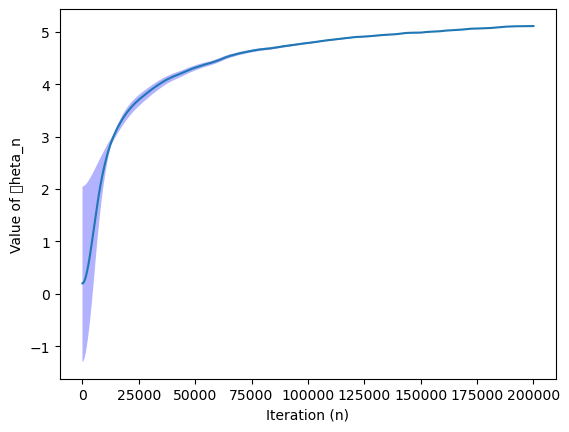

In [126]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

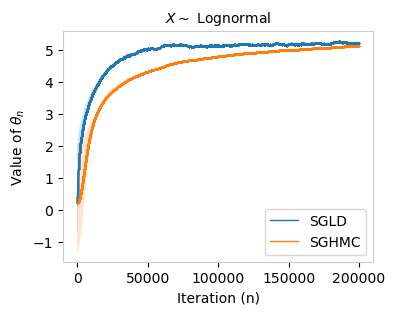

In [127]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Lognormal', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')

### lognormal 1 2

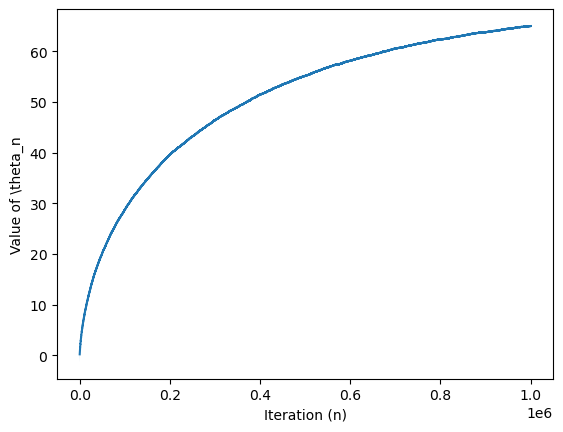

In [133]:
xlogn_mu1_sig_2 = np.random.lognormal(mean=1.0, sigma=2.0, size=int(1e+6))

theta_SGLD, theta_all_SGLD_sd1 = Model095_SGLD_sd1.estimate(xlogn_mu1_sig_2)
theta_SGHMC, theta_all_SGHMC_sd1 = Model095_SGHMC_sd1.estimate(xlogn_mu1_sig_2)

theta_SGLD, theta_all_SGLD_sd2 = Model095_SGLD_sd2.estimate(xlogn_mu1_sig_2)
theta_SGHMC, theta_all_SGHMC_sd2 = Model095_SGHMC_sd2.estimate(xlogn_mu1_sig_2)

theta_SGLD, theta_all_SGLD_sd3 = Model095_SGLD_sd3.estimate(xlogn_mu1_sig_2)
theta_SGHMC, theta_all_SGHMC_sd3 = Model095_SGHMC_sd3.estimate(xlogn_mu1_sig_2)

theta_SGLD, theta_all_SGLD_sd4 = Model095_SGLD_sd4.estimate(xlogn_mu1_sig_2)
theta_SGHMC, theta_all_SGHMC_sd4 = Model095_SGHMC_sd4.estimate(xlogn_mu1_sig_2)

theta_SGLD, theta_all_SGLD_sd5 = Model095_SGLD_sd5.estimate(xlogn_mu1_sig_2)
theta_SGHMC, theta_all_SGHMC_sd5 = Model095_SGHMC_sd5.estimate(xlogn_mu1_sig_2)

theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()


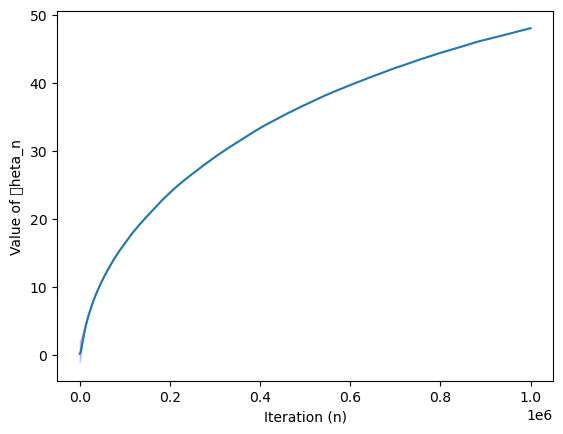

In [134]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

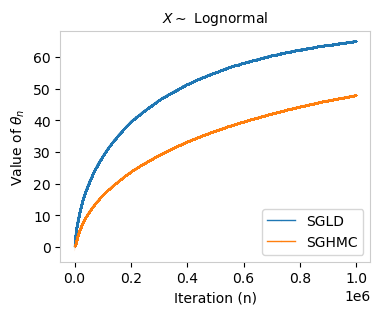

In [135]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Lognormal', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')

### lognormal 3 5

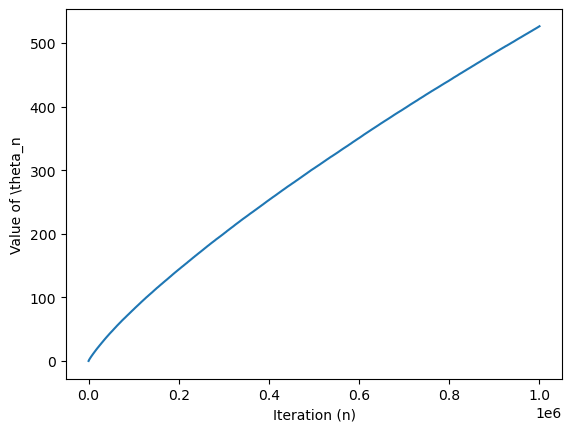

In [137]:
xlogn_mu3_sig_5 = np.random.lognormal(mean=3.0, sigma=5.0, size=int(1e+6))
theta_SGLD, theta_all_SGLD_sd1 = Model095_SGLD_sd1.estimate(xlogn_mu3_sig_5)
theta_SGHMC, theta_all_SGHMC_sd1 = Model095_SGHMC_sd1.estimate(xlogn_mu3_sig_5)

theta_SGLD, theta_all_SGLD_sd2 = Model095_SGLD_sd2.estimate(xlogn_mu3_sig_5)
theta_SGHMC, theta_all_SGHMC_sd2 = Model095_SGHMC_sd2.estimate(xlogn_mu3_sig_5)

theta_SGLD, theta_all_SGLD_sd3 = Model095_SGLD_sd3.estimate(xlogn_mu3_sig_5)
theta_SGHMC, theta_all_SGHMC_sd3 = Model095_SGHMC_sd3.estimate(xlogn_mu3_sig_5)

theta_SGLD, theta_all_SGLD_sd4 = Model095_SGLD_sd4.estimate(xlogn_mu3_sig_5)
theta_SGHMC, theta_all_SGHMC_sd4 = Model095_SGHMC_sd4.estimate(xlogn_mu3_sig_5)

theta_SGLD, theta_all_SGLD_sd5 = Model095_SGLD_sd5.estimate(xlogn_mu3_sig_5)
theta_SGHMC, theta_all_SGHMC_sd5 = Model095_SGHMC_sd5.estimate(xlogn_mu3_sig_5)

theta_all_SGLD_sd1 = np.array(theta_all_SGLD_sd1).astype(np.float); theta_all_SGHMC_sd1 = np.array(theta_all_SGHMC_sd1).astype(np.float)
theta_all_SGLD_sd2 = np.array(theta_all_SGLD_sd2).astype(np.float); theta_all_SGHMC_sd2 = np.array(theta_all_SGHMC_sd2).astype(np.float)
theta_all_SGLD_sd3 = np.array(theta_all_SGLD_sd3).astype(np.float); theta_all_SGHMC_sd3 = np.array(theta_all_SGHMC_sd3).astype(np.float)
theta_all_SGLD_sd4 = np.array(theta_all_SGLD_sd4).astype(np.float); theta_all_SGHMC_sd4 = np.array(theta_all_SGHMC_sd4).astype(np.float)
theta_all_SGLD_sd5 = np.array(theta_all_SGLD_sd5).astype(np.float); theta_all_SGHMC_sd5 = np.array(theta_all_SGHMC_sd5).astype(np.float)

x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGLD = np.mean([theta_all_SGLD_sd1, theta_all_SGLD_sd2, theta_all_SGLD_sd3, theta_all_SGLD_sd4, theta_all_SGLD_sd5], axis=0)
theta_all_SGLD_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)
theta_all_SGLD_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGLD_sd1,theta_all_SGLD_sd2), theta_all_SGLD_sd3), theta_all_SGLD_sd4), theta_all_SGLD_sd5)

plt.plot(x, theta_all_SGLD, label="SGLD") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGLD_upp, theta_all_SGLD_low, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel(r"Value of \theta_n",fontsize=10)
plt.show()


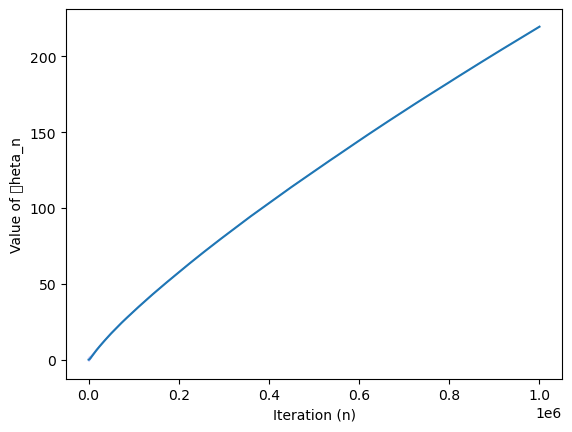

In [138]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

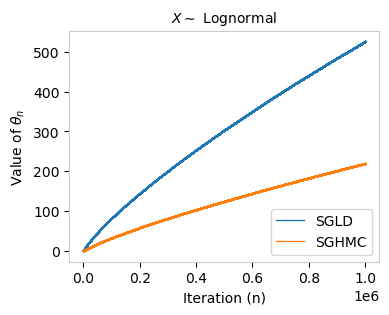

In [139]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Lognormal', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
ax.spines['bottom'].set_color('#ccc')

## Gumbel

### gumbel 0 1

In [115]:
# Gumbel
x_g_0_1 = np.random.gumbel(loc=0.0, scale=1, size=int(2e+5))
#x_g_0_1 = np.random.gumbel(loc=0.0, scale=1, size=int(2e+5))
#x_g_1_2 = np.random.gumbel(loc=1, scale=2, size=int(2e+5))

theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_g_0_1)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_g_0_1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_g_0_1)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_g_0_1)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_g_0_1)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_g_0_1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_g_0_1)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_g_0_1)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_g_0_1)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_g_0_1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_g_0_1)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_g_0_1)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_g_0_1)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_g_0_1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_g_0_1)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_g_0_1)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_g_0_1)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_g_0_1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_g_0_1)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_g_0_1)


In [116]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [2.970]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')

theta_SGHMC_95:2.969337383449604, var_SGHMC_95:0.0009911678689946517
theta_SGLD_95:2.9723244810205056, var_SGLD_95:0.0003861916275137231
mse_SGHMC_95:0.11155581246766068, mse_SGLD_95:0.17256970750709294


In [117]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [4.600]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')


theta_SGHMC_99:4.611674143388607, var_SGHMC_99:0.000540217055368084
theta_SGLD_99:4.467633393934884, var_SGLD_99:0.008075754259890034
mse_SGHMC_99:0.46159071539943414, mse_SGLD_99:1.0563435020144267


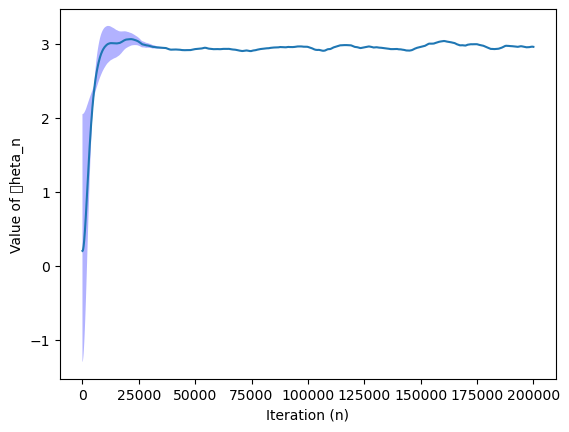

In [422]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

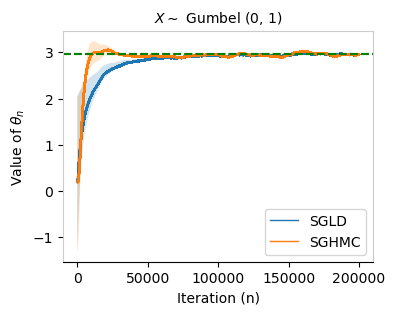

In [423]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Gumbel (0, 1)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=2.970,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
plt.savefig("./"+'g_0_1.png', dpi=300, bbox_inches='tight')

In [424]:
theta_all_SGHMC_variance = np.var([theta_all_SGHMC_sd1[10000:], theta_all_SGHMC_sd2[10000:], theta_all_SGHMC_sd3[10000:], theta_all_SGHMC_sd4[10000:], theta_all_SGHMC_sd5[10000:]])
theta_all_SGLD_variance = np.var([theta_all_SGLD_sd1[10000:], theta_all_SGLD_sd2[10000:], theta_all_SGLD_sd3[10000:], theta_all_SGLD_sd4[10000:], theta_all_SGLD_sd5[10000:]])
theta_all_SGHMC_mean = np.mean([theta_all_SGHMC_sd1[-100:], theta_all_SGHMC_sd2[-100:], theta_all_SGHMC_sd3[-100:], theta_all_SGHMC_sd4[-100:], theta_all_SGHMC_sd5[-100:]])
print(f'theta:{theta_all_SGHMC_mean}, var_SGHMC:{theta_all_SGHMC_variance}, var_SGLD:{theta_all_SGLD_variance}')

theta:2.9573194937411564, var_SGHMC:0.0027602272620172, var_SGLD:0.024897102566907362


### gumbel 0 2

In [118]:
x_g_0_2 = np.random.gumbel(loc=0.0, scale=2.0, size=int(2e+5))
theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_g_0_2)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_g_0_2)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_g_0_2)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_g_0_2)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_g_0_2)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_g_0_2)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_g_0_2)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_g_0_2)

theta_SGLD_sd3, theta_all_SGLD_d3_95 = Model095_SGLD_sd3.estimate(x_g_0_2)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_g_0_2)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_g_0_2)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_g_0_2)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_g_0_2)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_g_0_2)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_g_0_2)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_g_0_2)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_g_0_2)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_g_0_2)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_g_0_2)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_g_0_2)


In [119]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[100000:], theta_all_SGHMC_sd2_95[100000:], theta_all_SGHMC_sd3_95[100000:], theta_all_SGHMC_sd4_95[100000:], theta_all_SGHMC_sd5_95[100000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[100000:], theta_all_SGLD_sd2_95[100000:], theta_all_SGLD_sd3_95[100000:], theta_all_SGLD_sd4_95[100000:], theta_all_SGLD_sd5_95[100000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[-10000:], theta_all_SGHMC_sd2_95[-10000:], theta_all_SGHMC_sd3_95[-10000:], theta_all_SGHMC_sd4_95[-10000:], theta_all_SGHMC_sd5_95[-10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[-10000:], theta_all_SGLD_sd2_95[-10000:], theta_all_SGLD_sd3_95[-10000:], theta_all_SGLD_sd4_95[-10000:], theta_all_SGLD_sd5_95[-10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [5.940]*len(theta_all_SGHMC_sd1_95[:])*5
mse_sghmc_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGHMC_sd1_95[:], theta_all_SGHMC_sd2_95[:], theta_all_SGHMC_sd3_95[:], theta_all_SGHMC_sd4_95[:], theta_all_SGHMC_sd5_95[:]), axis=0))
mse_sgld_95 = mean_squared_error(x_95, np.concatenate((theta_all_SGLD_sd1_95[:], theta_all_SGLD_sd2_95[:], theta_all_SGLD_sd3_95[:], theta_all_SGLD_sd4_95[:], theta_all_SGLD_sd5_95[:]), axis=0))
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')


theta_SGHMC_95:5.943986808018388, var_SGHMC_95:0.0013772839971288977
theta_SGLD_95:5.3308186906272415, var_SGLD_95:1.3422274749938705
mse_SGHMC_95:0.757787152297601, mse_SGLD_95:3.1079695946831007


In [120]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [9.200]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')


theta_SGHMC_99:8.954527925733743, var_SGHMC_99:0.024723293146086064
theta_SGLD_99:8.240602987471858, var_SGLD_99:0.0770879182215201
mse_SGHMC_99:4.130450048907205, mse_SGLD_99:8.528237152375072


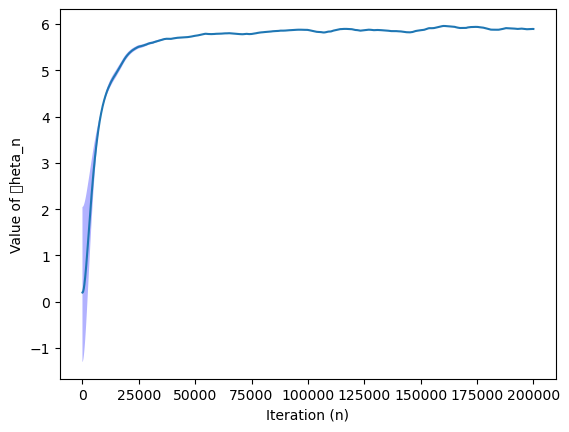

In [435]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

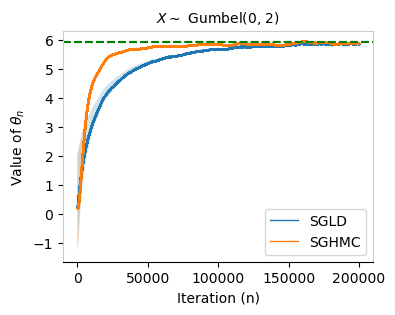

In [436]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Gumbel(0, 2)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=5.940,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
plt.savefig("./"+'g_0_2.png', dpi=300, bbox_inches='tight')

In [437]:
theta_all_SGHMC_variance = np.var([theta_all_SGHMC_sd1[10000:], theta_all_SGHMC_sd2[10000:], theta_all_SGHMC_sd3[10000:], theta_all_SGHMC_sd4[10000:], theta_all_SGHMC_sd5[10000:]])
theta_all_SGLD_variance = np.var([theta_all_SGLD_sd1[10000:], theta_all_SGLD_sd2[10000:], theta_all_SGLD_sd3[10000:], theta_all_SGLD_sd4[10000:], theta_all_SGLD_sd5[10000:]])
theta_all_SGHMC_mean = np.mean([theta_all_SGHMC_sd1[-1000:], theta_all_SGHMC_sd2[-1000:], theta_all_SGHMC_sd3[-1000:], theta_all_SGHMC_sd4[-1000:], theta_all_SGHMC_sd5[-1000:]])
print(f'theta:{theta_all_SGHMC_mean}, var_SGHMC:{theta_all_SGHMC_variance}, var_SGLD:{theta_all_SGLD_variance}')

theta:5.896225355447537, var_SGHMC:0.054630022193723995, var_SGLD:0.3550940931118667


### gumbel 1 2

In [121]:
x_g_1_2 = np.random.gumbel(loc=1.0, scale=2.0, size=int(2e+5))
theta_SGLD_sd1, theta_all_SGLD_sd1_95 = Model095_SGLD_sd1.estimate(x_g_1_2)
theta_SGLD_sd1, theta_all_SGLD_sd1_99 = Model099_SGLD_sd1.estimate(x_g_1_2)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_95 = Model095_SGHMC_sd1.estimate(x_g_1_2)
theta_SGHMC_sd1, theta_all_SGHMC_sd1_99 = Model099_SGHMC_sd1.estimate(x_g_1_2)


theta_SGLD_sd2, theta_all_SGLD_sd2_95 = Model095_SGLD_sd2.estimate(x_g_1_2)
theta_SGLD_sd2, theta_all_SGLD_sd2_99 = Model099_SGLD_sd2.estimate(x_g_1_2)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_95 = Model095_SGHMC_sd2.estimate(x_g_1_2)
theta_SGHMC_sd2, theta_all_SGHMC_sd2_99 = Model099_SGHMC_sd2.estimate(x_g_1_2)

theta_SGLD_sd3, theta_all_SGLD_sd3_95 = Model095_SGLD_sd3.estimate(x_g_1_2)
theta_SGLD_sd3, theta_all_SGLD_sd3_99 = Model099_SGLD_sd3.estimate(x_g_1_2)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_95 = Model095_SGHMC_sd3.estimate(x_g_1_2)
theta_SGHMC_sd3, theta_all_SGHMC_sd3_99 = Model099_SGHMC_sd3.estimate(x_g_1_2)


theta_SGLD_sd4, theta_all_SGLD_sd4_95 = Model095_SGLD_sd4.estimate(x_g_1_2)
theta_SGLD_sd4, theta_all_SGLD_sd4_99 = Model099_SGLD_sd4.estimate(x_g_1_2)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_95 = Model095_SGHMC_sd4.estimate(x_g_1_2)
theta_SGHMC_sd4, theta_all_SGHMC_sd4_99 = Model099_SGHMC_sd4.estimate(x_g_1_2)


theta_SGLD_sd5, theta_all_SGLD_sd5_95 = Model095_SGLD_sd5.estimate(x_g_1_2)
theta_SGLD_sd5, theta_all_SGLD_sd5_99 = Model099_SGLD_sd5.estimate(x_g_1_2)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_95 = Model095_SGHMC_sd5.estimate(x_g_1_2)
theta_SGHMC_sd5, theta_all_SGHMC_sd5_99 = Model099_SGHMC_sd5.estimate(x_g_1_2)


In [122]:
theta_all_SGHMC_variance_95 = np.var([theta_all_SGHMC_sd1_95[10000:], theta_all_SGHMC_sd2_95[10000:], theta_all_SGHMC_sd3_95[10000:], theta_all_SGHMC_sd4_95[10000:], theta_all_SGHMC_sd5_95[10000:]])
theta_all_SGLD_variance_95 = np.var([theta_all_SGLD_sd1_95[10000:], theta_all_SGLD_sd2_95[10000:], theta_all_SGLD_sd3_95[10000:], theta_all_SGLD_sd4_95[10000:], theta_all_SGLD_sd5_95[10000:]])
theta_all_SGHMC_mean_95 = np.mean([theta_all_SGHMC_sd1_95[10000:], theta_all_SGHMC_sd2_95[10000:], theta_all_SGHMC_sd3_95[10000:], theta_all_SGHMC_sd4_95[10000:], theta_all_SGHMC_sd5_95[10000:]])
theta_all_SGLD_mean_95 = np.mean([theta_all_SGLD_sd1_95[10000:], theta_all_SGLD_sd2_95[10000:], theta_all_SGLD_sd3_95[10000:], theta_all_SGLD_sd4_95[10000:], theta_all_SGLD_sd5_95[10000:]])

print(f'theta_SGHMC_95:{theta_all_SGHMC_mean_95}, var_SGHMC_95:{theta_all_SGHMC_variance_95}')
print(f'theta_SGLD_95:{theta_all_SGLD_mean_95}, var_SGLD_95:{theta_all_SGLD_variance_95}')

x_95 = [6.940]*len(theta_all_SGHMC_sd1_95[10000:])
mse_sghmc_95 = mean_squared_error(x_95, theta_all_SGHMC_sd1_95[10000:])
mse_sgld_95 = mean_squared_error(x_95, theta_all_SGLD_sd1_95[10000:])
print(f'mse_SGHMC_95:{mse_sghmc_95}, mse_SGLD_95:{mse_sgld_95}')


theta_SGHMC_95:6.816814992436435, var_SGHMC_95:0.053951044495667594
theta_SGLD_95:6.45649405227184, var_SGLD_95:0.42214582590926986
mse_SGHMC_95:0.05606587232705972, mse_SGLD_95:0.7656524052756414


In [123]:
theta_all_SGHMC_variance_99 = np.var([theta_all_SGHMC_sd1_99[100000:], theta_all_SGHMC_sd2_99[100000:], theta_all_SGHMC_sd3_99[100000:], theta_all_SGHMC_sd4_99[100000:], theta_all_SGHMC_sd5_99[100000:]])
theta_all_SGLD_variance_99 = np.var([theta_all_SGLD_sd1_99[100000:], theta_all_SGLD_sd2_99[100000:], theta_all_SGLD_sd3_99[100000:], theta_all_SGLD_sd4_99[100000:], theta_all_SGLD_sd5_99[100000:]])
theta_all_SGHMC_mean_99 = np.mean([theta_all_SGHMC_sd1_99[-10000:], theta_all_SGHMC_sd2_99[-10000:], theta_all_SGHMC_sd3_99[-10000:], theta_all_SGHMC_sd4_99[-10000:], theta_all_SGHMC_sd5_99[-10000:]])
theta_all_SGLD_mean_99 = np.mean([theta_all_SGLD_sd1_99[-10000:], theta_all_SGLD_sd2_99[-10000:], theta_all_SGLD_sd3_99[-10000:], theta_all_SGLD_sd4_99[-10000:], theta_all_SGLD_sd5_99[-10000:]])

print(f'theta_SGHMC_99:{theta_all_SGHMC_mean_99}, var_SGHMC_99:{theta_all_SGHMC_variance_99}')
print(f'theta_SGLD_99:{theta_all_SGLD_mean_99}, var_SGLD_99:{theta_all_SGLD_variance_99}')

x_99 = [10.200]*len(theta_all_SGHMC_sd1_99[:])*5
mse_sghmc_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGHMC_sd1_99[:],theta_all_SGHMC_sd2_99[:],theta_all_SGHMC_sd3_99[:],theta_all_SGHMC_sd4_99[:],theta_all_SGHMC_sd5_99[:])))
mse_sgld_99 = mean_squared_error(x_99, np.concatenate((theta_all_SGLD_sd1_99[:], theta_all_SGLD_sd2_99[:], theta_all_SGLD_sd3_99[:], theta_all_SGLD_sd4_99[:], theta_all_SGLD_sd5_99[:])))
print(f'mse_SGHMC_99:{mse_sghmc_99}, mse_SGLD_99:{mse_sgld_99}')


theta_SGHMC_99:9.954324408427462, var_SGHMC_99:0.02440201357898782
theta_SGLD_99:9.227623646235129, var_SGLD_99:0.07881502822254924
mse_SGHMC_99:4.414847100034538, mse_SGLD_99:9.22187629370363


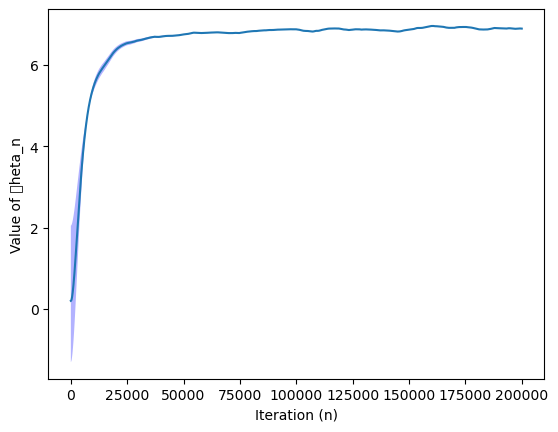

In [430]:
x = np.arange(len(theta_all_SGLD_sd5)) 
theta_all_SGHMC = np.mean([theta_all_SGHMC_sd1, theta_all_SGHMC_sd2, theta_all_SGHMC_sd3, theta_all_SGHMC_sd4, theta_all_SGHMC_sd5], axis=0)
theta_all_SGHMC_upp = np.maximum(np.maximum(np.maximum(np.maximum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)
theta_all_SGHMC_low = np.minimum(np.minimum(np.minimum(np.minimum(theta_all_SGHMC_sd1,theta_all_SGHMC_sd2), theta_all_SGHMC_sd3), theta_all_SGHMC_sd4), theta_all_SGHMC_sd5)

plt.plot(x, theta_all_SGHMC, label="SGHMC") # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
plt.fill_between(x, theta_all_SGHMC_upp, theta_all_SGHMC_low, #上限，下限
        facecolor='b', #填充颜色
        # edgecolor='red', #边界颜色
    alpha=0.3
) #透明度
plt.xlabel("Iteration (n)",fontsize=10)
plt.ylabel("Value of \theta_n",fontsize=10)
plt.show()

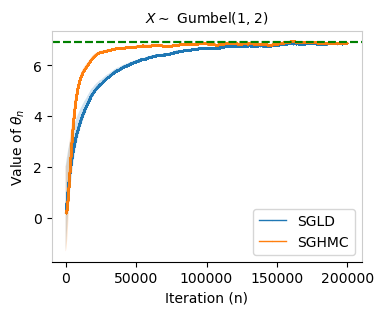

In [431]:
plt.figure(figsize=(4, 3)) # 设置整个图像的尺寸（长高分别为6、5个单位）
plt.title(r'$X \sim$ Gumbel(1, 2)', size = 10) # 设置标题以及大小
models = ['SGLD', 'SGHMC'] # 定义好所有模型名称
maker = ['^','s'] # 曲线标记
cnt=0
x = np.arange(len(theta_all_SGLD_sd1)) # 作为横轴
x_names = [str(i) for i in x] # 横轴展示的值
results = { # 用于展示每个方法的曲线
    'SGLD': theta_all_SGLD,
    'SGHMC': theta_all_SGHMC
}
ranges_top = { # 用于展示每个方法的上界
    'SGLD': theta_all_SGLD_upp,
    'SGHMC': theta_all_SGHMC_upp
}
ranges_bottom = { # 用于展示每个方法的下界
    'SGLD': theta_all_SGLD_low,
    'SGHMC': theta_all_SGHMC_low
}
for model_name in models:
    y = np.array(results[model_name]).astype(np.float) # 每个方法的值
    y1 = np.array(ranges_top[model_name]).astype(np.float) # 每个方法的上界
    y2 = np.array(ranges_bottom[model_name]).astype(np.float) # 每个方法的下界
    makevery =1
    #plt.xscale("log", base=2) # 设置横轴为2倍指数递增
    plt.plot(x, y, label=model_name, linewidth=1, marker=maker[cnt], markevery=makevery, markersize=0.05) # 绘制当前模型的曲线
    # 填充上下界区域内，设置边界、填充部分颜色，以及透明度
    plt.fill_between(x, y1, y2, #上限，下限
        # facecolor='green', #填充颜色
        # edgecolor='red', #边界颜色
        alpha=0.2
    ) #透明度
    plt.axhline(y=6.940,c="g", ls="--")
    plt.xlabel("Iteration (n)",fontsize=10)
    plt.ylabel(r'Value of $\theta_n$',fontsize=10)
    #plt.ylim([70.0, 100.0]) # 设置纵轴大小范围
    #plt.xticks(x, x_names, rotation=0, size = 20) # 设置横轴坐标轴刻度，文字大小为20
    #plt.yticks(np.arange(70, 100, 5), rotation=0, size = 20) # 设置纵轴坐标轴刻度（70-100，每隔5个单位绘制刻度），文字大小为20
    cnt+=1
font1 = {
    'weight' : 'normal',
    'size'   : 10,
}
plt.legend(loc = "lower right", prop=font1) # 设置信息框
plt.grid(False) # 不显示网格线
ax=plt.gca()  #gca:get current axis得到当前轴
# 设置图像的边框颜色
ax.spines['right'].set_color('#ccc')
ax.spines['top'].set_color('#ccc')
ax.spines['left'].set_color('#ccc')
plt.savefig("./"+'g_1_2.png', dpi=300, bbox_inches='tight')

In [432]:
theta_all_SGHMC_variance = np.var([theta_all_SGHMC_sd1[10000:], theta_all_SGHMC_sd2[10000:], theta_all_SGHMC_sd3[10000:], theta_all_SGHMC_sd4[10000:], theta_all_SGHMC_sd5[10000:]])
theta_all_SGLD_variance = np.var([theta_all_SGLD_sd1[10000:], theta_all_SGLD_sd2[10000:], theta_all_SGLD_sd3[10000:], theta_all_SGLD_sd4[10000:], theta_all_SGLD_sd5[10000:]])
theta_all_SGHMC_mean = np.mean([theta_all_SGHMC_sd1[-100:], theta_all_SGHMC_sd2[-100:], theta_all_SGHMC_sd3[-100:], theta_all_SGHMC_sd4[-100:], theta_all_SGHMC_sd5[-100:]])
print(f'theta:{theta_all_SGHMC_mean}, var_SGHMC:{theta_all_SGHMC_variance}, var_SGLD:{theta_all_SGLD_variance}')

theta:6.887183955847488, var_SGHMC:0.049437444483185114, var_SGLD:0.40648476734244005


## Portfolio optimization

In [470]:
class SGLD_portfolios:

    def __init__(self, theta0, beta, lam_c, lr, q, number):
        self.theta0 = theta0 # Initial value \theta_0
        self.beta = beta # Temperature para
        self.lam_c = lam_c # Regularization
        self.lr = lr # Learning rate
        self.q = q
        self.number = number # number of assets
        #self.theta_dup = [theta0]

    def cal_g(self, w):
        """
        input:
            w: array column 3*1
        output:
            g: array column 3*1
            partial_g: numpy matrix 3*3
        """
        g = np.zeros_like(w)
        partial_g = np.zeros([len(w),len(w)])

        for i in range(len(w)):
            g[i] = math.exp(w[i])

        for j in range(len(w)):
            for k in range(len(w)):
                if j == k:
                    partial_g[j][k] = (g[j]*(sum(g)-g[j])) / (sum(g)**2)
                else:
                    partial_g[j][k] = -(g[j] * g[k]) / (sum(g) ** 2)

        g = g / sum(g)
        return g, partial_g

    def cal_H(self, x, theta, w):
        """
        input:
            x: array column 3*1
        output:
            H_theta: scalar
            H_w: array, 3 * 1
        """
        g_w, partial_g_w = self.cal_g(w)
        H_theta = 1 - (1/(1-self.q)) * (np.dot(g_w.squeeze(), x) >= theta) + 2 * self.lam_c * theta
        H_w = ((1/(1-self.q)) * (np.dot(g_w.squeeze(), x) >= theta) * np.dot(partial_g_w, x))[:,np.newaxis] \
                  + 2 * self.lam_c * w

        return H_theta, H_w

    def estimate(self, x_array):
        """
        x_array: numpy ndarray 3*n sampled from distribution of assests, each row represents an asset
        """
        theta = self.theta0
        w = np.zeros([self.number,1])
        for i in range(x_array.shape[1]):
            H_theta, H_w = self.cal_H(x_array[:,i], theta, w)
            theta += -self.lr * H_theta \
                     + math.sqrt((2*self.lr/self.beta)) * np.random.normal(0, 1)
            w += -self.lr * H_w \
                     + math.sqrt((2*self.lr/self.beta)) * np.random.normal(0, 1, self.number)[:,np.newaxis]

        g_w_exp, blabla = self.cal_g(w)
        return np.hstack([g_w_exp.squeeze(), theta])
    
    
        #expectation = self.lam_c * (theta**2 + np.linalg.norm(w, ord=2))
        #for j in range(x_array.shape[1]):
        #    x = x_array[:,j]
        #    expectation += ( theta + (1/(1-self.q)) * (np.dot(g_w_exp.squeeze(), x) - theta) * (np.dot(g_w_exp.squeeze(), x) >= theta) )/(x_array.shape[1])
        #return np.hstack([g_w_exp.squeeze(), theta, expectation])




In [468]:
class SGHMC_portfolios:
    def __init__(self, theta0, beta, lam_c, lr, gamma, q, number):
        self.theta0 = theta0 # initial value \theta_0
        self.beta = beta # Temperature para
        self.lam_c = lam_c # Regularization
        self.lr = lr # Learning rate
        self.q = q
        self.gamma = gamma # momentum
        self.number = number

    def cal_g(self, w):
        """
        input:
            w: array column 3*1
        output:
            g: array column 3*1
            partial_g: numpy matrix 3*3
        """
        g = np.zeros_like(w)
        partial_g = np.zeros([len(w),len(w)])

        for i in range(len(w)):
            g[i] = math.exp(w[i])

        for j in range(len(w)):
            for k in range(len(w)):
                if j == k:
                    partial_g[j][k] = (g[j]*(sum(g)-g[j])) / (sum(g)**2)
                else:
                    partial_g[j][k] = -(g[j] * g[k]) / (sum(g) ** 2)

        g = g / sum(g)
        return g, partial_g

    def cal_H(self, x, theta, w):
        """
        input:
            x: array column 3*1
        output:
            H_theta: scalar
            H_w: array, 3 * 1
        """
        g_w, partial_g_w = self.cal_g(w)
        H_theta = 1 - (1/(1-self.q)) * (np.dot(g_w.squeeze(), x) >= theta) + 2 * self.lam_c * theta
        H_w = ((1/(1-self.q)) * (np.dot(g_w.squeeze(), x) >= theta) * np.dot(partial_g_w, x))[:,np.newaxis] \
                  + 2 * self.lam_c * w

        return H_theta, H_w

    def estimate(self, x_array):
        """
        x_array: numpy ndarray 3 * n sampled from distribution of assets, each row represents an asset
        """
        theta = self.theta0
        w = np.zeros([self.number,1])

        vol_theta = 0
        vol_w = np.zeros([self.number,1])
    
        for i in range(x_array.shape[1]):
            H_theta, H_w = self.cal_H(x_array[:,i], theta, w)
            vol_theta += - self.lr * self.gamma * vol_theta - self.lr * H_theta + math.sqrt((2 * self.lr * self.gamma / self.beta)) * np.random.normal(0, 1)
            vol_w += - self.lr * self.gamma * vol_w  - self.lr * H_w + math.sqrt((2*self.lr / self.beta)) * np.random.normal(0, 1, self.number)[:,np.newaxis]

            theta +=  self.lr * vol_theta
            w += self.lr * vol_w

        g_w_exp, g_w_exp_partial = self.cal_g(w)
    
        return np.hstack([g_w_exp.squeeze(), theta])
    
        #expectation = self.lam_c * (theta**2 + np.linalg.norm(w, ord=2))
        #for j in range(x_array.shape[1]):
        #    x = x_array[:,j]
        #    expectation += ( theta + (1/(1-self.q)) * (np.dot(g_w_exp.squeeze(), x) - theta) * (np.dot(g_w_exp.squeeze(), x) >= theta) )/(x_array.shape[1])

        #return np.hstack([g_w_exp.squeeze(), theta, expectation])


In [471]:
theta0 = 3
beta = 1e+8
lam_c = 1e-8
lr = 1e-4
gamma = 3

Model_SGLD = SGLD_portfolios(theta0, beta, lam_c, lr, 0.95, 2)

""""Notice that in N(0, 10^6), sigma = 1e+3 and similar is others"""
# #case1
asset1 =        np.random.normal(500, 1,         int(1e+5))[np.newaxis,:]
asset2 =        np.random.normal(0,   int(1e-4), int(1e+5))[np.newaxis,:]
#asset3 = 0.01 * np.random.normal(0,   1,         int(1e+5))[np.newaxis,:]

case1 = np.concatenate((asset1, asset2), axis=0)
print(Model_SGLD.estimate(case1))

[1.41217213e-04 9.99858783e-01 7.18073013e-02]


In [472]:
# #case1
Model_SGHMC = SGHMC_portfolios(theta0, beta, lam_c, lr, gamma, 0.95, 2)
asset1 =        np.random.normal(500, 1,         int(1e+5))[np.newaxis,:]
asset2 =        np.random.normal(0,   int(1e-4), int(1e+5))[np.newaxis,:]
#asset3 = 0.01 * np.random.normal(0,   1,         int(1e+5))[np.newaxis,:]
case1 = np.concatenate((asset1, asset2), axis=0)

print(Model_SGHMC.estimate(case1))

[1.88716964e-21 1.00000000e+00 1.37520529e-01]


In [ ]:
theta0 = 3
beta = 1e+8
lam_c = 1e-8
lr = 1e-4

Model = SGLD_portfolios(theta0, beta, lam_c, lr, 0.95, 2)

""""Notice that in N(0, 10^6), sigma = 1e+3 and similar is others"""
# #case1
asset1 =        np.random.normal(500, 1,         int(1e+4))[np.newaxis,:]
asset2 =        np.random.normal(0,   int(1e+3), int(1e+4))[np.newaxis,:]
asset3 = 0.01 * np.random.normal(0,   1,         int(1e+4))[np.newaxis,:]

case1 = np.concatenate((asset1, asset2, asset3), axis=0)
a = Model.estimate(case1)



'''
# #case2
asset1 = np.random.normal(500, 1,         int(1e+4))[np.newaxis,:]
asset2 = np.random.normal(0,   int(1e+3), int(1e+4))[np.newaxis,:]
asset3 = np.random.normal(0,   1,         int(1e+4))[np.newaxis,:]

case2 = np.concatenate((asset1, asset2, asset3), axis=0)

# #case3
asset1 = math.sqrt(1000) * np.random.normal(0,   1,         int(1e+4))[np.newaxis,:]
asset2 =                np.random.normal(0,   1,         int(1e+4))[np.newaxis,:]
asset3 =                np.random.normal(0,   2,         int(1e+4))[np.newaxis,:]

case3 = np.concatenate((asset1, asset2, asset3), axis=0)

# #case4
asset1 =        np.random.normal(0,   1,         int(1e+4))[np.newaxis,:]
asset2 =        np.random.normal(1,   2,         int(1e+4))[np.newaxis,:]
asset3 = 0.01 * np.random.normal(0,   1,         int(1e+4))[np.newaxis,:]

case4 = np.concatenate((asset1, asset2, asset3), axis=0)

# #case5
asset1 = np.random.normal(0,   1,         int(1e+4))[np.newaxis,:]
asset2 = np.random.normal(1,   2,         int(1e+4))[np.newaxis,:]
asset3 = np.random.normal(2,   1,         int(1e+4))[np.newaxis,:]

case5 = np.concatenate((asset1, asset2, asset3), axis=0)

cases = [case1, case2, case3, case4 ,case5]
Chart = np.zeros([5,5])

for i in range(len(cases)):
    results = Model.estimate(cases[i])
    Chart[i,:] = results

Chart_df = pd.DataFrame(Chart)
Chart_df.columns = ["g1(w)", "g2(w)", "g3(w)", "VaR", "CVaR"]
Chart_df.index = ["Case1", "Case2", "Case3", "Case4", "Case5"]

print(Chart_df)
'''